In [15]:
#These lines set up inline plotting, and apply a standard size
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})
# Standard includes
import datetime
import re
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
import matplotlib.pyplot as plt
from time import time

In [16]:
# Define the query
my_query = {
  "size": 0,
  "query": {
    "bool": {
    "must": [
    {
      "range": {
        "@timestamp": {
        "gte": 1451602800000,
        "lte": 1475618400000,
        "format": "epoch_millis"
         }
        }
       },
      {"term": {"event_type": "transfer-failed"}},
      {"term": {"payload.scope": "data16_13TeV"}}
    ]
    }
  }
}

In [17]:
es = Elasticsearch(['atlas-kibana.mwt2.org:9200'],timeout=60)
my_index = "rucio-events-2017*"
scroll = scan(es, query=my_query, index=my_index, scroll='5m', timeout="5m", size=100)

In [18]:
count=0
t0 = time()
allSizes = []
for res in scroll:
    if not count%1000:  print(count)
    if count<1: print(res)
    count += 1
    if res['_source']['event_type']=='transfer-failed':
        allSizes.append(res['_source']['payload']['file-size'])
    

    

In [19]:
t1 = time()
print (count, 'events in %f seconds.' %(t1-t0), count/(t1-t0), "ev/s.")

0 events in 0.015237 seconds. 0.0 ev/s.


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

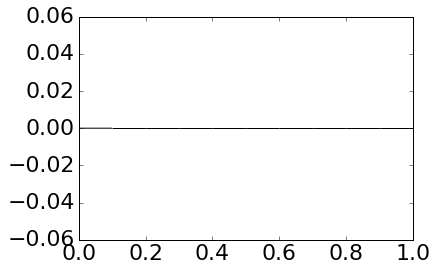

In [20]:
plt.hist(allSizes)